# Importing Libraries

In [1]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Fetching Dataset

In [2]:
START = "2010-01-01"
END = "2022-12-31"

def load_data(ticker):
    data = yf.download(ticker, START, END)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data('GOOG')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.610239,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.541497,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.149715,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.797037,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.994298,189680313


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,15.615220,15.678981,15.547723,15.610239,78541293
1,15.620949,15.637387,15.480475,15.541497,120638494
2,15.588072,15.588072,15.102393,15.149715,159744526
3,15.178109,15.193053,14.760922,14.797037,257533695
4,14.744733,15.024933,14.672753,14.994298,189680313


In [5]:
df.shape

(3272, 5)

# Closing Price Visualisation

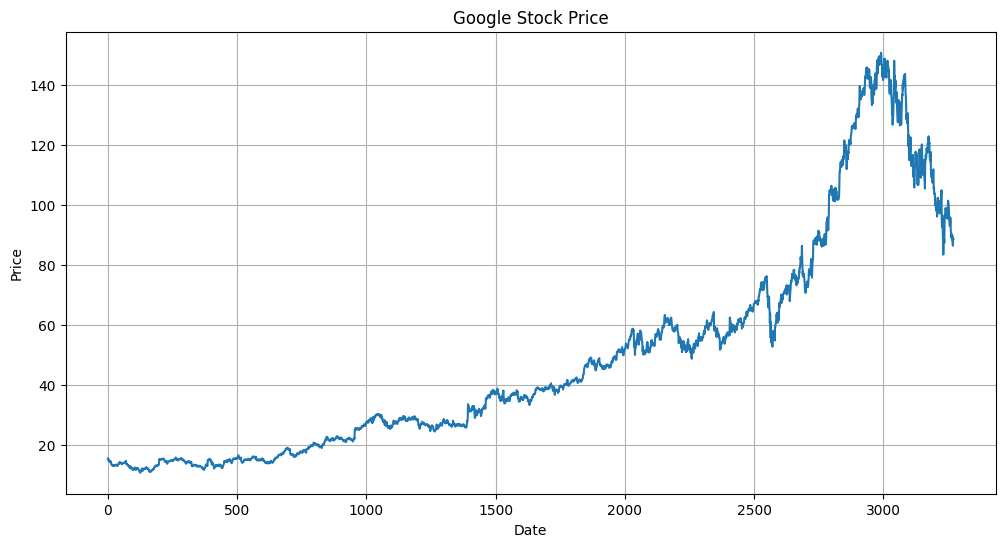

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Google Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# Plotting moving averages of 100 days

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    101.9020
3268    101.5926
3269    101.2750
3270    100.9831
3271    100.6954
Name: Close, Length: 3272, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

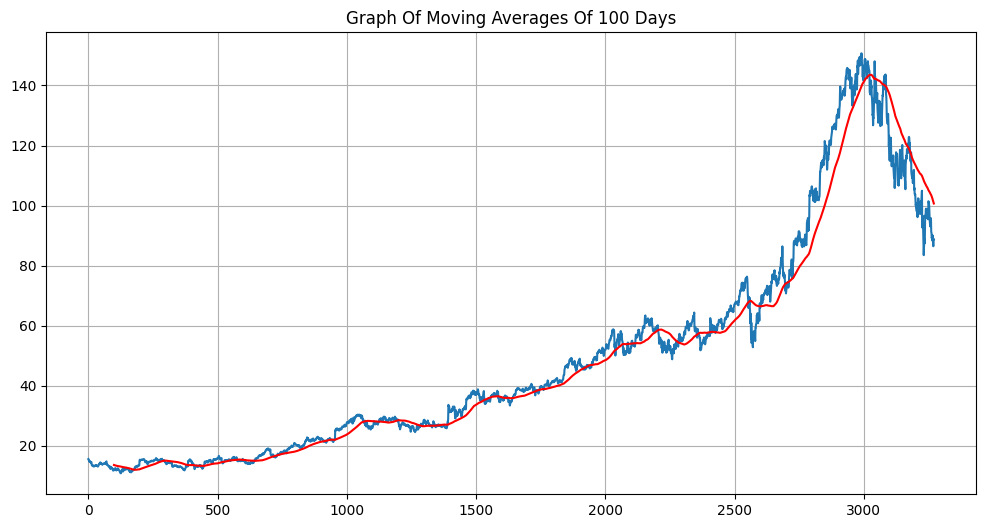

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Comparision of 100 days moving averages and 200 days moving average

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    110.950400
3268    110.737673
3269    110.536268
3270    110.332715
3271    110.107912
Name: Close, Length: 3272, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

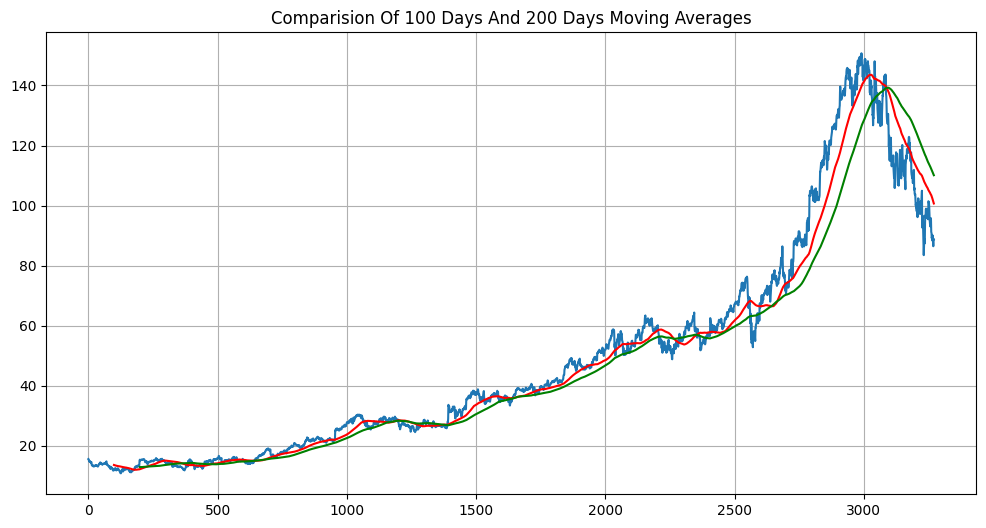

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

# Train Test Split

In [11]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2290, 7)
(982, 7)


In [12]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2285,2019-02-01,55.619999,56.250000,55.244499,55.537498,55.537498,29244000
2286,2019-02-04,55.632999,56.639999,55.451000,56.639999,56.639999,51530000
2287,2019-02-05,56.242001,57.342499,55.862400,57.299500,57.299500,71044000
2288,2019-02-06,56.978500,57.349998,55.638500,55.761501,55.761501,42112000
2289,2019-02-07,55.208000,55.242001,54.299999,54.935501,54.935501,40896000


In [13]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2290,2019-02-08,54.349998,54.945499,54.327499,54.752998,54.752998,21516000
2291,2019-02-11,54.847500,55.297249,54.643002,54.750500,54.750500,21304000
2292,2019-02-12,55.340000,56.264751,55.292500,56.068501,56.068501,32182000
2293,2019-02-13,56.249500,56.736500,55.924999,56.007999,56.007999,20996000
2294,2019-02-14,55.902500,56.411499,55.522251,56.083500,56.083500,18952000


# Using MinMax Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [16]:
train_close

array([[15.61023903],
       [15.54149723],
       [15.14971542],
       ...,
       [57.29949951],
       [55.76150131],
       [54.9355011 ]])

In [17]:
test_close

array([[ 54.75299835],
       [ 54.75049973],
       [ 56.06850052],
       [ 56.00799942],
       [ 56.08349991],
       [ 55.68249893],
       [ 55.9280014 ],
       [ 55.68999863],
       [ 54.8484993 ],
       [ 55.51850128],
       [ 55.47000122],
       [ 55.75650024],
       [ 55.80250168],
       [ 55.99599838],
       [ 57.04949951],
       [ 57.38999939],
       [ 58.10150146],
       [ 57.89300156],
       [ 57.16500092],
       [ 57.11600113],
       [ 58.7879982 ],
       [ 59.65999985],
       [ 59.66600037],
       [ 59.27750015],
       [ 59.22299957],
       [ 59.21300125],
       [ 59.94250107],
       [ 61.19850159],
       [ 61.57699966],
       [ 60.27500153],
       [ 59.65000153],
       [ 59.23099899],
       [ 58.65100098],
       [ 58.42449951],
       [ 58.66550064],
       [ 59.7215004 ],
       [ 60.0245018 ],
       [ 60.29600143],
       [ 60.75      ],
       [ 60.35749817],
       [ 60.19200134],
       [ 59.86249924],
       [ 60.10800171],
       [ 60

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.09036547],
       [0.08905749],
       [0.08160285],
       ...,
       [0.88360866],
       [0.85434437],
       [0.83862763]])

# Generating Sequence

In [19]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [20]:
x_train

array([[[0.09036547],
        [0.08905749],
        [0.08160285],
        ...,
        [0.01947302],
        [0.01943038],
        [0.01867213]],

       [[0.08905749],
        [0.08160285],
        [0.07489226],
        ...,
        [0.01943038],
        [0.01867213],
        [0.02577606]],

       [[0.08160285],
        [0.07489226],
        [0.07864564],
        ...,
        [0.01867213],
        [0.02577606],
        [0.02348706]],

       ...,

       [[0.91345333],
        [0.8996203 ],
        [0.91152201],
        ...,
        [0.85542892],
        [0.85008215],
        [0.87106001]],

       [[0.8996203 ],
        [0.91152201],
        [0.90885817],
        ...,
        [0.85008215],
        [0.87106001],
        [0.88360866]],

       [[0.91152201],
        [0.90885817],
        [0.89317954],
        ...,
        [0.87106001],
        [0.88360866],
        [0.85434437]]])

In [21]:
y_train

array([0.02577606, 0.02348706, 0.02194212, ..., 0.88360866, 0.85434437,
       0.83862763])

In [22]:
print(x_train.shape)
print(y_train.shape)

(2190, 100, 1)
(2190,)


# LSTM Model Building

In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [26]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 46s 312ms/step - loss: 0.0857 - mean_absolute_error: 0.2029
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 23s 336ms/step - loss: 0.0080 - mean_absolute_error: 0.0607
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 353ms/step - loss: 0.0056 - mean_absolute_error: 0.0512
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 346ms/step - loss: 0.0057 - mean_absolute_error: 0.0528
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - loss: 0.0054 - mean_absolute_error: 0.0511
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 356ms/step - loss: 0.0049 - mean_absolute_error: 0.0479
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 354ms/step - loss: 0.0047 - mean_absolute_error: 0.0468
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 358ms/step - loss: 0.0050 - mean_absolute_error: 0.0478
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 353ms/step - loss: 0.0045 - mean_absolute_error: 0.0463
Epoch 10/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 351ms/step - loss: 0.0049 - mean_absolute_error: 0.0474
Epoch 11/

# Preparing the testing data

In [27]:
# Fetching last 100 days data from training set
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

In [29]:
#Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.
final_df = past_100_days.append(test_df, ignore_index = True)

C:\Users\anuj\AppData\Local\Temp\ipykernel_6740\2664292686.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(test_df, ignore_index = True)


In [30]:
final_df.head()

,0
0,58.626499
1,57.802502
2,58.061001
3,58.554501
4,59.343498


In [31]:
final_df.shape

(1082, 1)

In [32]:
input_data = scaler.fit_transform(final_df)

# Testing the model

In [33]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


# Making Predictions

In [35]:
y_pred = model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step


In [36]:
y_pred

array([[0.10028546],
       [0.10296218],
       [0.10516514],
       [0.10683645],
       [0.10796387],
       [0.10860634],
       [0.10879187],
       [0.10862976],
       [0.10820358],
       [0.10748461],
       [0.106592  ],
       [0.10563886],
       [0.10481425],
       [0.10424916],
       [0.10404639],
       [0.10435829],
       [0.10528515],
       [0.10693975],
       [0.10926662],
       [0.11202012],
       [0.11491013],
       [0.11788449],
       [0.1209853 ],
       [0.12420827],
       [0.1274342 ],
       [0.13049866],
       [0.13322671],
       [0.1355811 ],
       [0.13775924],
       [0.14000066],
       [0.14225672],
       [0.14432289],
       [0.14592135],
       [0.14674668],
       [0.14658377],
       [0.14543462],
       [0.14368737],
       [0.14185399],
       [0.14042547],
       [0.13979934],
       [0.14008221],
       [0.14118542],
       [0.14285196],
       [0.1448224 ],
       [0.14685068],
       [0.14883158],
       [0.15071215],
       [0.152

In [37]:
y_pred.shape

(982, 1)

In [38]:
y_test

array([0.05831319, 0.05828867, 0.07122318, 0.07062944, 0.07137038,
       0.06743506, 0.06984436, 0.06750866, 0.05925041, 0.06582563,
       0.06534967, 0.06816129, 0.06861274, 0.07051167, 0.08085045,
       0.08419202, 0.09117452, 0.08912835, 0.08198395, 0.08150308,
       0.09791161, 0.10646921, 0.10652809, 0.10271546, 0.1021806 ,
       0.10208248, 0.1092416 , 0.12156765, 0.12528213, 0.11250467,
       0.10637109, 0.10225911, 0.09656716, 0.09434433, 0.09670945,
       0.10707276, 0.11004633, 0.11271076, 0.11716618, 0.11331427,
       0.11169013, 0.10845648, 0.11086578, 0.11207284, 0.11857446,
       0.12015937, 0.1231182 , 0.12763745, 0.12765216, 0.13377103,
       0.14147972, 0.13728433, 0.14093996, 0.14522366, 0.1527802 ,
       0.10415316, 0.09414315, 0.09145911, 0.10264186, 0.10459971,
       0.09709711, 0.09325501, 0.09134624, 0.09227365, 0.07645391,
       0.07076683, 0.09224419, 0.09949165, 0.091307  , 0.07980039,
       0.08508997, 0.08596831, 0.08074252, 0.07716049, 0.07749

In [39]:
y_test.shape

(982,)

In [40]:
scaler.scale_

array([0.00981374])

In [41]:
# Scaling back to original values

scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

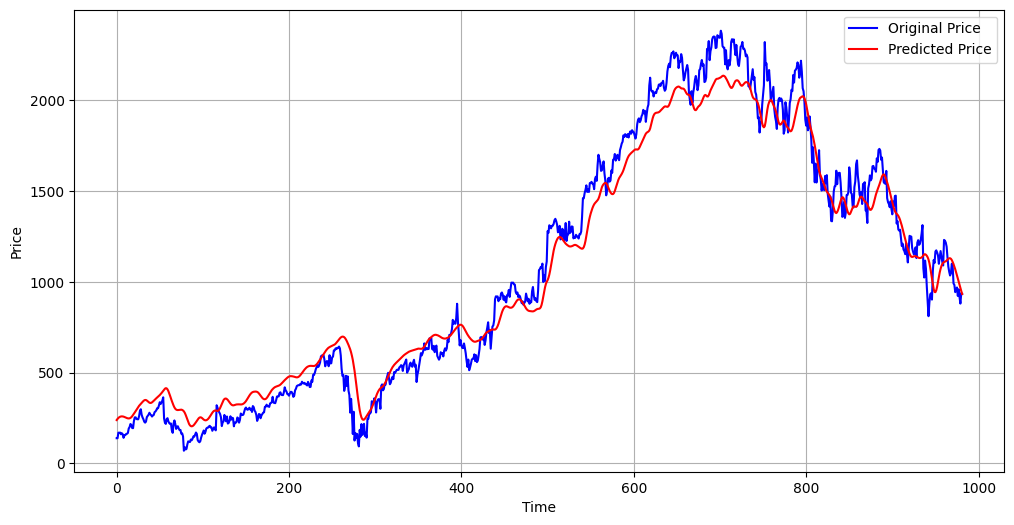

In [42]:
# Plotting graph of original and predicted closing Price
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model Evaluation

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test = np.array(y_test)  # Convert to numpy array if not already
y_pred = np.array(y_pred)  # Convert to numpy array if not already

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error on test set: {:.2f}%".format(mae_percentage))
print("Mean Squared Error on test set: {:.2f}".format(mse))
print("Root Mean Squared Error on test set: {:.2f}".format(rmse))
print("R-squared (R2) Score on test set: {:.2f}".format(r2))

Mean Absolute Error on test set: 9.49%
Mean Squared Error on test set: 15083.69
Root Mean Squared Error on test set: 122.82
R-squared (R2) Score on test set: 0.97


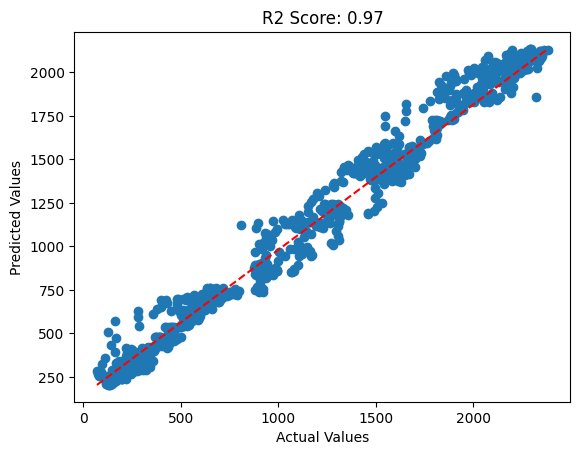

In [44]:
actual = y_test

predicted = y_pred

plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

# Prediction of Stock price for 2023

In [144]:
START = "2023-01-01"
END = "2023-12-31"

def load_data(ticker):
    new_data = yf.download(ticker, START, END)
    new_data.reset_index(inplace=True)
    return new_data

In [145]:
jan_data = load_data('GOOG')
jan_df=jan_data
jan_df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
1,2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2,2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
3,2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
4,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700


In [146]:
jan_close =  jan_data.iloc[:, 4:5].values

In [147]:
# last 100 days of 2022
test_past_100 = pd.DataFrame(test_close[-100:])

In [148]:
jan_df = pd.DataFrame(jan_close)

In [149]:
final_jan_df = test_past_100.append(jan_df, ignore_index = True)


C:\Users\anuj\AppData\Local\Temp\ipykernel_6740\1385974450.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_jan_df = test_past_100.append(jan_df, ignore_index = True)


In [150]:
final_jan_df

,0
0,120.650002
1,119.820000
2,122.650002
3,122.879997
4,122.510002
...,...
345,142.720001
346,142.820007
347,141.440002
348,141.279999


In [151]:
jan_df.shape

(250, 1)

In [152]:
jan_input_data = scaler.fit_transform(final_jan_df)
jan_input_data

array([[0.62632728],
       [0.61233771],
       [0.66003704],
       [0.66391359],
       [0.65767736],
       [0.62076514],
       [0.62986679],
       [0.58368447],
       [0.53227704],
       [0.52722053],
       [0.52604069],
       [0.57660532],
       [0.46873421],
       [0.45255342],
       [0.44530594],
       [0.4324962 ],
       [0.45609305],
       [0.42457439],
       [0.40434859],
       [0.45491322],
       [0.43704696],
       [0.47682448],
       [0.47834149],
       [0.36777341],
       [0.37721223],
       [0.3440081 ],
       [0.33945721],
       [0.3431653 ],
       [0.30911851],
       [0.27844264],
       [0.28788133],
       [0.26428447],
       [0.25821671],
       [0.24608118],
       [0.29074662],
       [0.24608118],
       [0.2133828 ],
       [0.26647569],
       [0.31889437],
       [0.3156919 ],
       [0.31602894],
       [0.27102645],
       [0.25653125],
       [0.24540709],
       [0.24962081],
       [0.27338612],
       [0.2307433 ],
       [0.291

In [153]:
jan_input_data.shape

(350, 1)

# Testing the model

In [154]:
x_test = []
y_test = []
for i in range(100, jan_input_data.shape[0]):
   x_test.append(jan_input_data[i-100: i])
   y_test.append(jan_input_data[i, 0])

In [155]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(250, 100, 1)
(250,)


# Making predictions

In [156]:

y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


In [157]:
y_pred.shape

(250, 1)

In [158]:
y_test

array([0.10466877, 0.08798248, 0.05528398, 0.07871237, 0.08949948,
       0.09691554, 0.14781734, 0.14191816, 0.15691899, 0.14613188,
       0.13972694, 0.17562791, 0.26613852, 0.29866844, 0.26495868,
       0.22315866, 0.26411602, 0.290241  , 0.2437215 , 0.27608296,
       0.30237653, 0.42659702, 0.36625653, 0.3367605 , 0.41378728,
       0.27827405, 0.2017529 , 0.19164   , 0.19399967, 0.19315687,
       0.22939488, 0.20714645, 0.18708911, 0.14427783, 0.14006411,
       0.12776   , 0.09876959, 0.11141075, 0.1147818 , 0.11832131,
       0.14866001, 0.17748183, 0.20377553, 0.18001009, 0.18810049,
       0.15455932, 0.12674875, 0.13770444, 0.18135851, 0.22012478,
       0.29630877, 0.31973703, 0.31080397, 0.37670647, 0.34940165,
       0.38378562, 0.38041456, 0.32984993, 0.30119669, 0.31029834,
       0.30052248, 0.34569356, 0.36103156, 0.36457107, 0.36170564,
       0.42828248, 0.39541539, 0.38142594, 0.36625653, 0.41631553,
       0.43772117, 0.38648233, 0.36457107, 0.36288548, 0.37771

In [159]:
y_pred

array([[0.13906908],
       [0.13098843],
       [0.12576999],
       [0.12225811],
       [0.12006417],
       [0.11900398],
       [0.1190349 ],
       [0.12084663],
       [0.12448438],
       [0.12972087],
       [0.13600512],
       [0.14292379],
       [0.15016308],
       [0.15783808],
       [0.16609228],
       [0.17488717],
       [0.1840003 ],
       [0.19315286],
       [0.20222399],
       [0.21091567],
       [0.21903414],
       [0.22665136],
       [0.23486406],
       [0.24397343],
       [0.2536441 ],
       [0.26375273],
       [0.27390614],
       [0.28338197],
       [0.29131413],
       [0.29700527],
       [0.3004397 ],
       [0.3017118 ],
       [0.30089232],
       [0.29827783],
       [0.29390737],
       [0.28768173],
       [0.27914053],
       [0.2672997 ],
       [0.2523512 ],
       [0.23544219],
       [0.21806934],
       [0.20267397],
       [0.1912414 ],
       [0.18480521],
       [0.18272424],
       [0.1838494 ],
       [0.18698116],
       [0.191

In [160]:
scaler.scale_

array([0.01685488])

In [161]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

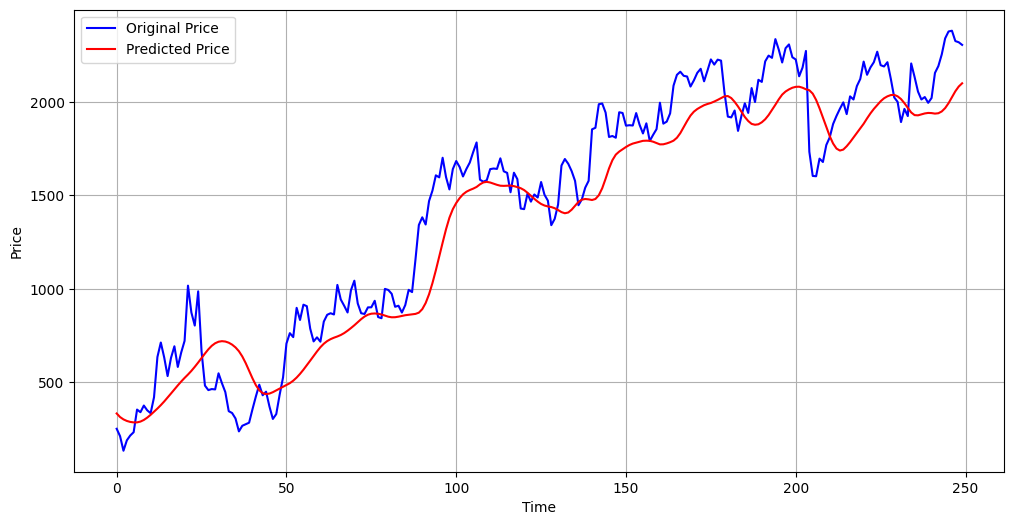

In [162]:
# plotting original and prediction stock price of Jan 2023
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 2023 prediction evaluation

In [164]:
y_test = np.array(y_test)  # Convert to numpy array if not already
y_pred = np.array(y_pred)  # Convert to numpy array if not already

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error on 2023 set: {:.2f}%".format(mae_percentage))
print("Mean Squared Error on 2023 set: {:.2f}".format(mse))
print("Root Mean Squared Error on 2023 set: {:.2f}".format(rmse))
print("R-squared (R2) Score on 2023 set: {:.2f}".format(r2))

Mean Absolute Error on 2023 set: 12.13%
Mean Squared Error on 2023 set: 45897.90
Root Mean Squared Error on 2023 set: 214.24
R-squared (R2) Score on 2023 set: 0.89


# Summary

<h2> Data from Jan 2010 to Dec 2022</h2>
    
    Mean Absolute Error on test set: 9.49%
    Mean Squared Error on test set: 15083.69
    Root Mean Squared Error on test set: 122.82
    R-squared (R2) Score on test set: 0.97
        
<h2> Prediction for year 2023</h2>

    Mean Absolute Error on 2023 set: 12.13%
    Mean Squared Error on 2023 set: 45897.90
    Root Mean Squared Error on 2023 set: 214.24
    R-squared (R2) Score on 2023 set: 0.89